# Plot results using the DataFrame stored in pickle file

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os
from pandas.io.json import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options

#Define plotting style:
sns.set() #Set style
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.2)

### Load results:

In [2]:
#Merge with SModelS DataFrame
dataDF = pd.read_pickle('scan_results.pcl')
#print(dataDF.columns.values.tolist()) #Print all columns names

#### Set r = 0 for points with no results 

In [3]:
#Set points without results with r == 0
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)
#Get max chi^2
chi2Cols = [col for col in dataDF.columns.values if '.chi2' in col]
for col in chi2Cols:
    dataDF.fillna(value={col : 0.0},inplace=True)
dataDF['maxChi2'] = dataDF[chi2Cols].max(axis=1)
#Add simple flag for excluded points:
dataDF['excluded'] = dataDF['ExptRes.result0.r'] > 1.
dataDF.dropna(axis=1,how='all',inplace=True)
Excluded = dataDF[dataDF['excluded'] == True]
Allowed = dataDF[dataDF['excluded'] == False]

#### Plot distribution of allowed and excluded points

889 excluded points 
 1148 allowed points


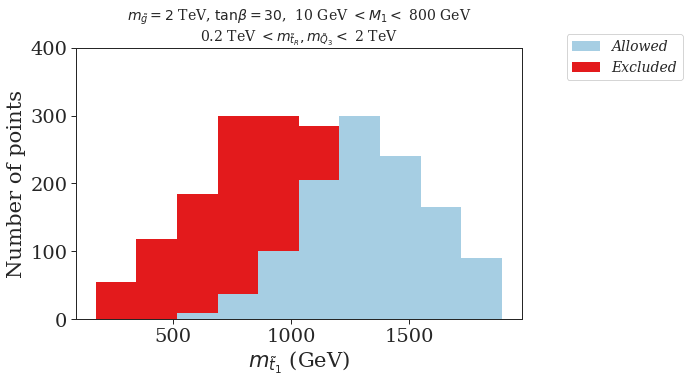

In [15]:
plt.figure(figsize=(8,5))
nbins = 10
colors = np.take(sns.color_palette("Paired"),[0,5],axis=0)
plt.hist([Allowed['mass.1000006'],Excluded['mass.1000006']],nbins,stacked=True, 
                            histtype='bar', label=['Allowed','Excluded'],
                            linewidth=0, fill=True, color=colors)
lgd = plt.legend(bbox_to_anchor=(1.1, 1.05), loc=2, borderaxespad=0.,
                 prop={'family' :'serif','style' : 'italic', 'size' : 14},framealpha=1.)

print('%i excluded points \n %i allowed points' %(len(Excluded),len(Allowed)))
plt.title(r'$m_{\tilde{g}} = 2$ TeV, $\tan\beta = 30$,  10 GeV $< M_1 <$ 800 GeV'+ '\n' + r'0.2 TeV $< m_{\tilde{t}_R},m_{\tilde{Q}_3} <$ 2 TeV', fontsize=14)
plt.xlabel(r'$m_{\tilde{t}_1}$ (GeV)')
plt.ylabel('Number of points')
plt.ylim(0,400)
plt.show()

889 excluded points 
 1148 allowed points


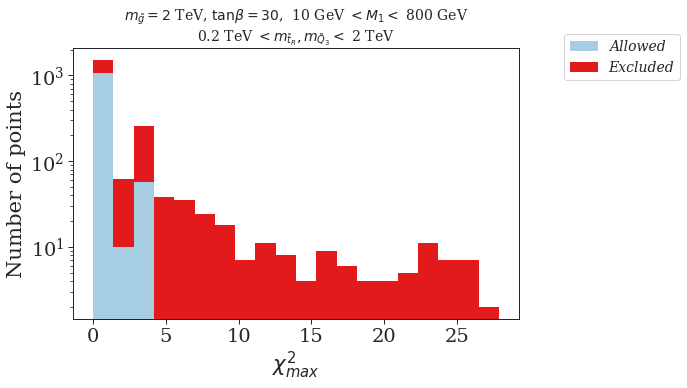

In [14]:
plt.figure(figsize=(8, 5))
nbins = 20
colors = np.take(sns.color_palette("Paired"),[0,5],axis=0)
plt.hist([Allowed['maxChi2'],Excluded['maxChi2']],nbins,stacked=True, 
                            histtype='bar', label=['Allowed','Excluded'],
                            linewidth=0, fill=True, color=colors)
lgd = plt.legend(bbox_to_anchor=(1.1, 1.05), loc=2, borderaxespad=0.,
                 prop={'family' :'serif','style' : 'italic', 'size' : 14},framealpha=1.)

print('%i excluded points \n %i allowed points' %(len(Excluded),len(Allowed)))
plt.title(r'$m_{\tilde{g}} = 2$ TeV, $\tan\beta = 30$,  10 GeV $< M_1 <$ 800 GeV'+ '\n' + r'0.2 TeV $< m_{\tilde{t}_R},m_{\tilde{Q}_3} <$ 2 TeV', fontsize=14)
plt.xlabel(r'$\chi^2_{max}$')
plt.ylabel('Number of points')
# plt.xlim(0.001,15.)
plt.yscale('log')
plt.show()

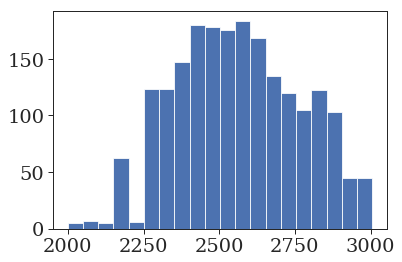

In [6]:
plt.hist(dataDF['extpar.11'],bins=20)
plt.show()

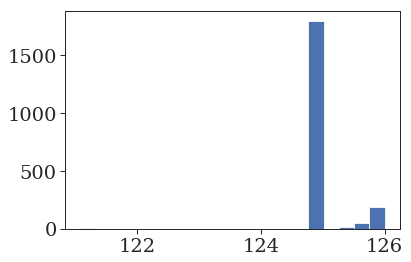

In [7]:
plt.hist(dataDF['mass.25'],bins=20)
plt.show()

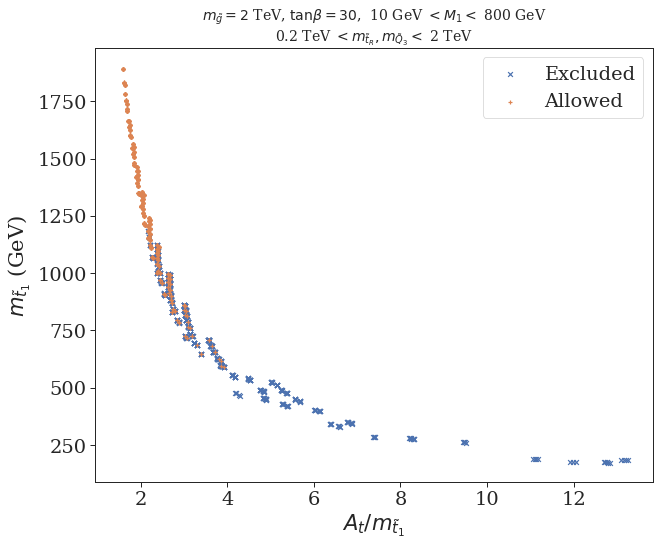

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(Excluded['extpar.11'].div(Excluded['mass.1000006']),Excluded['mass.1000006'],label='Excluded',marker='x')
plt.scatter(Allowed['extpar.11'].div(Allowed['mass.1000006']),Allowed['mass.1000006'],label='Allowed',marker='+')
plt.legend()
# print('%i excluded points \n %i allowed points' %(len(Excluded),len(Allowed)))
plt.title(r'$m_{\tilde{g}} = 2$ TeV, $\tan\beta = 30$,  10 GeV $< M_1 <$ 800 GeV'+ '\n' + r'0.2 TeV $< m_{\tilde{t}_R},m_{\tilde{Q}_3} <$ 2 TeV', fontsize=14)
plt.ylabel(r'$m_{\tilde{t}_1}$ (GeV)')
plt.xlabel(r'$A_t/m_{\tilde{t}_1}$')
plt.show()

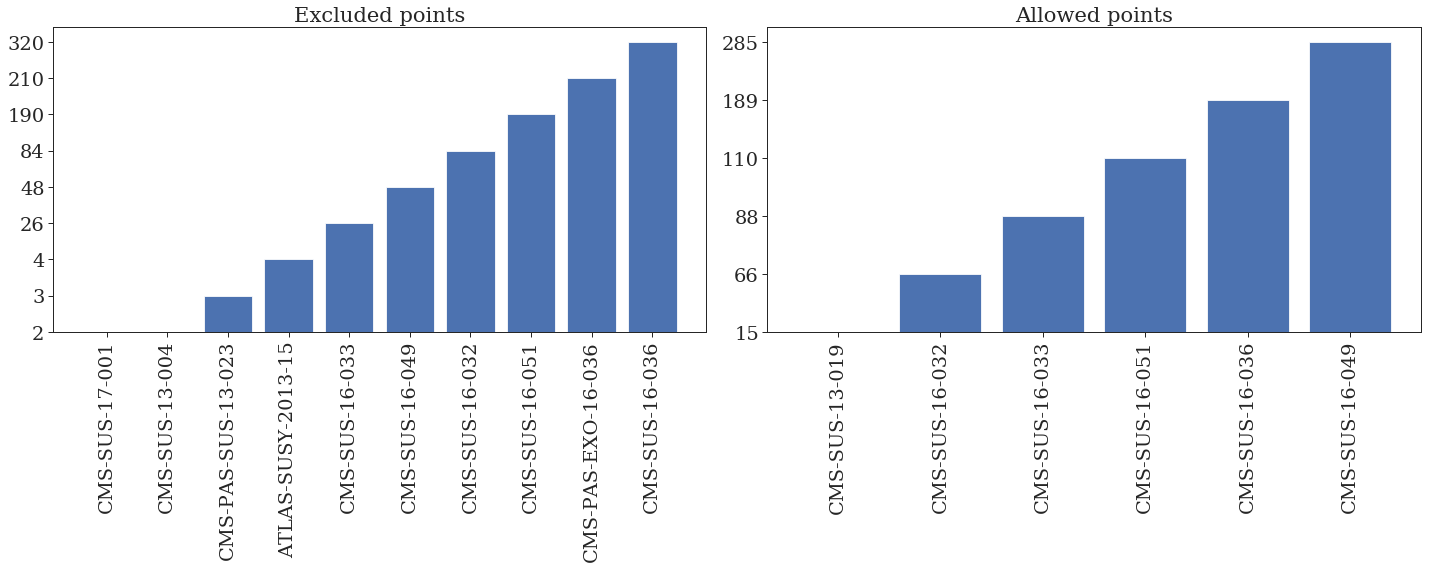

In [9]:
plt.figure(figsize=(20, 8))
analysesExcluded = set(Excluded['ExptRes.result0.AnalysisID'].values.tolist())
analysesCounter = []
for ana in analysesExcluded:
    analysesCounter.append([ana,len(Excluded[Excluded['ExptRes.result0.AnalysisID'] == ana])])
analysesCounter = sorted(analysesCounter, key = lambda pt: pt[1],reverse=False)
# print(analysesCounter)
analysesCounter = np.array(analysesCounter)
plt.subplot(1, 2, 1)
plt.bar(analysesCounter[:,0],analysesCounter[:,1])
plt.xticks(range(len(analysesCounter)), analysesCounter[:,0], rotation=90)
plt.title("Excluded points")
plt.subplot(1, 2, 2)
analysesAllowed = set(Allowed['ExptRes.result0.AnalysisID'].values.tolist())
analysesCounter = []
for ana in analysesAllowed:
    if str(ana) == 'nan': continue
    analysesCounter.append([ana,len(Allowed[Allowed['ExptRes.result0.AnalysisID'] == ana])])
analysesCounter = sorted(analysesCounter, key = lambda pt: pt[1],reverse=False)
# print(analysesCounter)
analysesCounter = np.array(analysesCounter)
plt.bar(analysesCounter[:,0],analysesCounter[:,1])
plt.xticks(range(len(analysesCounter)), analysesCounter[:,0], rotation=90)
plt.title("Allowed points")
plt.tight_layout()
plt.show()

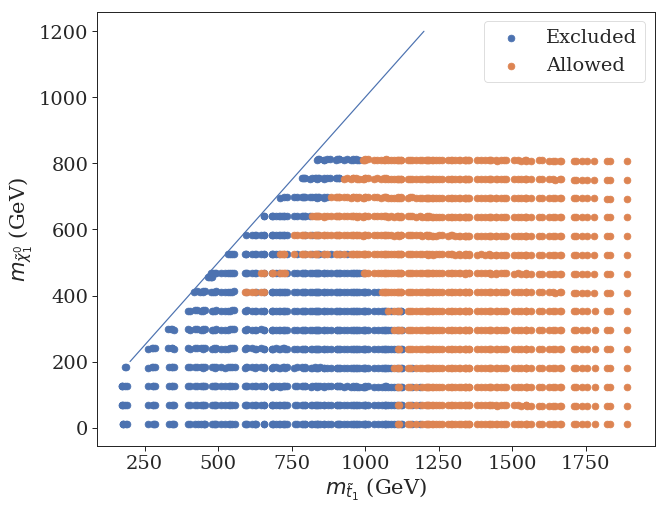

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(Excluded['mass.1000006'],Excluded['mass.1000022'],label='Excluded',s=45)
plt.scatter(Allowed['mass.1000006'],Allowed['mass.1000022'],label='Allowed',s=45)
plt.plot(np.linspace(200,1200,10),np.linspace(200,1200,10))
plt.xlabel(r'$m_{\tilde{t}_1}$ (GeV)')
plt.ylabel(r'$m_{\tilde{\chi}_1^0}$ (GeV)')
plt.legend()
plt.show()

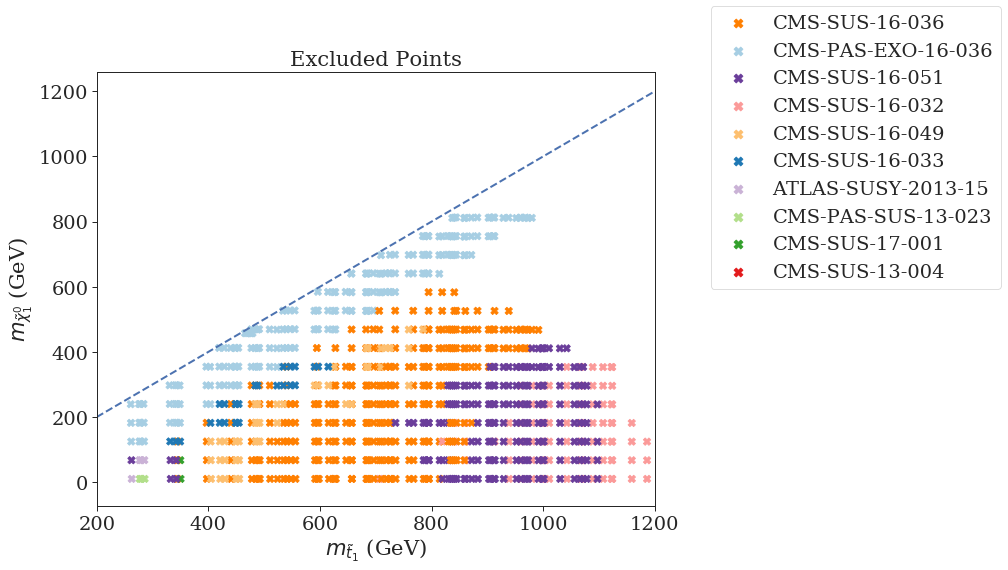

In [13]:
analysesExcluded = set(Excluded['ExptRes.result0.AnalysisID'].values.tolist())
analysesCounter = []
for ana in analysesExcluded:
    analysesCounter.append([ana,len(Excluded[Excluded['ExptRes.result0.AnalysisID'] == ana])])
analysesCounter = sorted(analysesCounter, key = lambda pt: pt[1],reverse=True)
analysesCounter = np.array(analysesCounter)
cPalette = sns.color_palette("Paired", len(analysesCounter))
cMap = dict([[ana,cPalette[i]] for i,ana in enumerate(list(analysesExcluded))])
color = [cMap[ana] for ana in Excluded['ExptRes.result0.AnalysisID']]


plt.figure(figsize=(10, 8))
plt.plot(np.linspace(200,1200,10),np.linspace(200,1200,10),linewidth=2.,linestyle='--')
plt.scatter(Excluded['mass.1000006'],Excluded['mass.1000022'],c=color,s=55,label=None,marker='X')
for ana in analysesCounter[:,0]:
    plt.scatter([0.],[0.],c=[cMap[ana]],label=ana,s=80,marker='X')
plt.legend(loc=(1.1,0.5))
plt.xlabel(r'$m_{\tilde{t}_1}$ (GeV)')
plt.ylabel(r'$m_{\tilde{\chi}_1^0}$ (GeV)')
plt.title("Excluded Points")
plt.xlim(200,1200)
plt.show()